In [130]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns 

In [131]:
data_set = "C:/Users/Owner/source/vsc_repo/confusion_matrix/iris_confusion_matrix/Iris.csv"
iris_data = pd.read_csv(data_set, engine="c", delimiter=",", encoding="utf-8", header=0, on_bad_lines="warn")

In [132]:
iris_data = iris_data.drop("Id", axis=1, errors="ignore", inplace=False)

In [133]:
iris_data.index

RangeIndex(start=0, stop=150, step=1)

In [134]:
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [135]:
iris_data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [136]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [137]:
iris_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [138]:
iris_data.tail(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


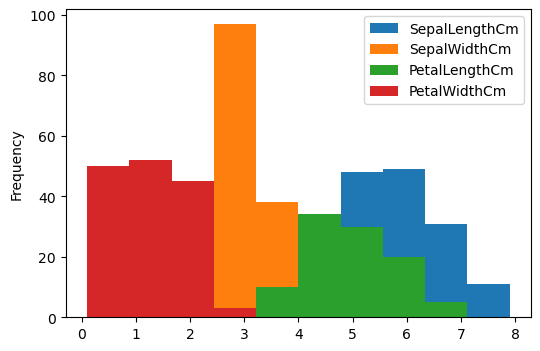

In [139]:

iris_data.plot.hist(subplots=False, figsize=(6,4));

In [140]:
x = iris_data.drop("Species", axis=1, inplace=False, errors="ignore")
# X scale-min_max = (X — X min)/ (X max — X min)
X = (x - np.min(x)) / (np.max(x) -np.min(x))
# X scale_MAS = x / max(abs|x|)
#   X = x / np.max(np.abs(x))
# X z-score = (x - mean / (x - std)  *normal distribution
#   X = (x - np.mean(x)) / (x - np.std(x))
y = iris_data["Species"]

c:\ProgramData\Anaconda3\envs\conda_env\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\ProgramData\Anaconda3\envs\conda_env\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.09, random_state=1)

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=1)
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()
y_train_rf = y_train.copy()
y_test_rf = y_test.copy()
rf.fit(X_train_rf, y_train_rf)
print("Random Forest Classifier: ", rf.score(X_test_rf, y_test_rf))

Random Forest Classifier:  1.0


In [143]:
from sklearn.metrics import confusion_matrix
y_predict_rf = rf.predict(X_test_rf)

cm_rf = confusion_matrix(y_test_rf, y_predict_rf)
cm_rf

array([[5, 0, 0],
       [0, 5, 0],
       [0, 0, 4]], dtype=int64)

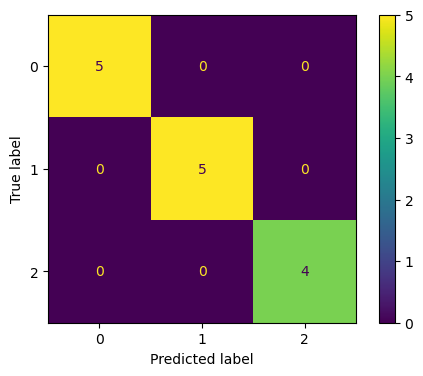

In [144]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, axe = plt.subplots(figsize=(6,4), constrained_layout=False, dpi=100)
# cm_display = ConfusionMatrixDisplay(cm_rf).plot()
cm_display = ConfusionMatrixDisplay(cm_rf)
cm_display.plot(ax=axe);

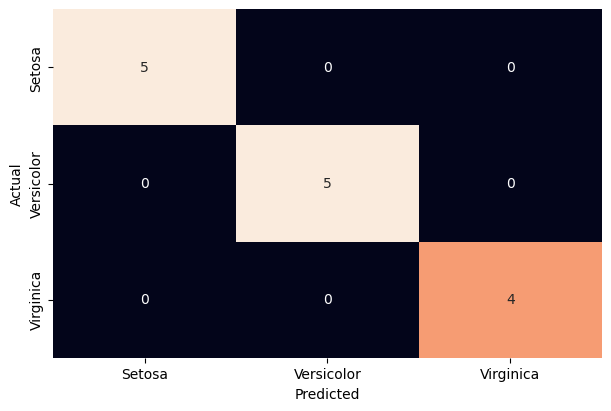

In [145]:
plt.figure(figsize=(6,4), constrained_layout=True, dpi=100)
axe = sns.heatmap(cm_rf,annot=True,  fmt=".3g", cbar= False, xticklabels=["Setosa","Versicolor","Virginica"], yticklabels=["Setosa","Versicolor","Virginica"]);
axe.set_xlabel("Predicted");
axe.set_ylabel("Actual");


In [146]:
from sklearn.svm import SVC
svc = SVC(kernel="linear", random_state=42)
X_train_svc = X_train.copy()
X_test_svc = X_test.copy()
y_train_svc = y_train.copy()
y_test_svc = y_test.copy()
svc.fit(X_train_svc, y_train_svc)
print("Support Vector Classifier: ", svc.score(X_test_svc, y_test_svc))

Support Vector Classifier:  1.0


In [147]:
from sklearn.metrics import confusion_matrix
y_predict_svc = svc.predict(X_test_svc)

cm_svc = confusion_matrix(y_test_svc, y_predict_svc)
cm_svc

array([[5, 0, 0],
       [0, 5, 0],
       [0, 0, 4]], dtype=int64)